#  Heart disease prediction model using Keras

### Heart Disease Dataset
#### About Dataset
##### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

##### Attribute Information:

> age   
> sex   
> chest pain type (4 values)  =  [cp]    
> resting blood pressure       = [trestbps]     
> serum cholestoral in mg/dl   = [chol]      
> fasting blood sugar > 120 mg/dl   =[fbs]      
> resting electrocardiographic results (values 0,1,2)  = [restecg]      
> maximum heart rate achieved   = [thalach]     
> exercise induced angina   =[exang]        
> oldpeak = ST depression induced by exercise relative to rest =[oldpeak]       
> the slope of the peak exercise ST segment =[slope]        
> number of major vessels (0-3) colored by flourosopy   =[ca]       
> thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data= pd.read_csv('heart.csv')

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.shape

(1025, 14)

In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

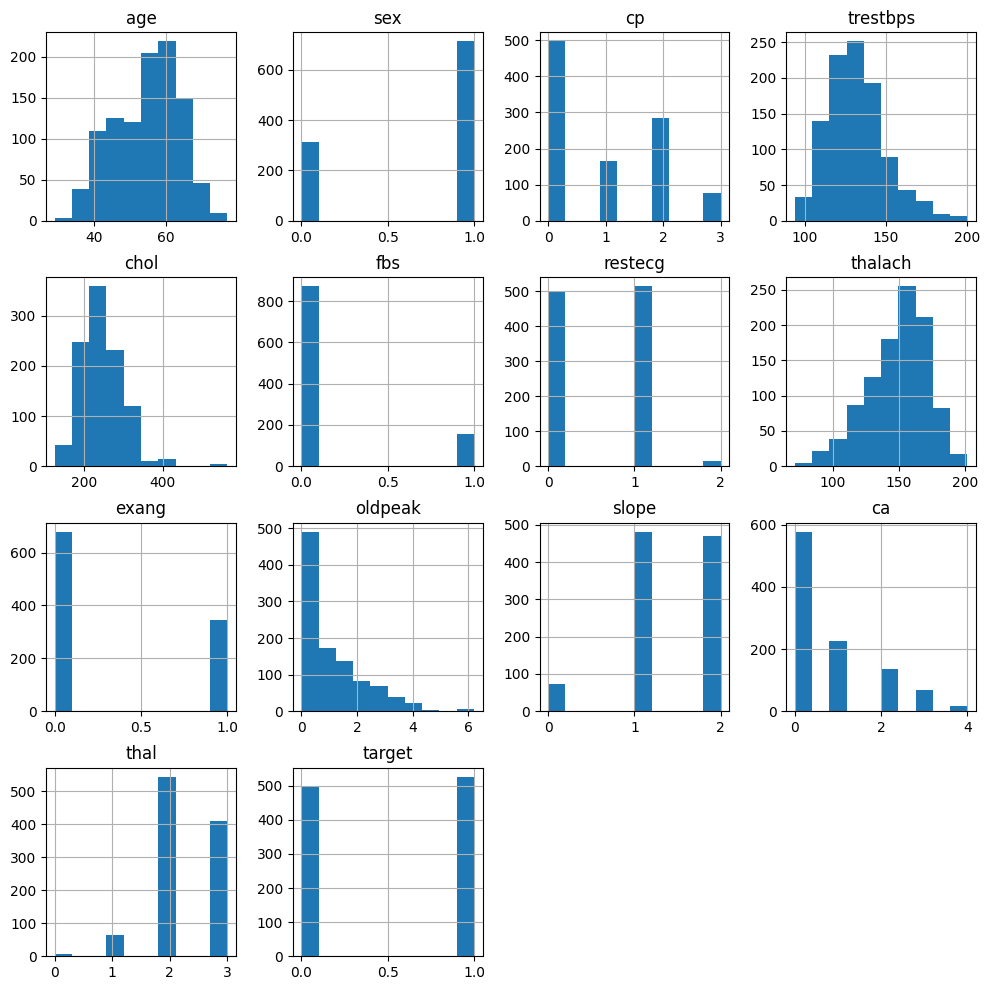

In [11]:
data.hist(figsize =(12,12))
plt.show()

## Checking correlation

In [12]:
cor =data.corr()
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

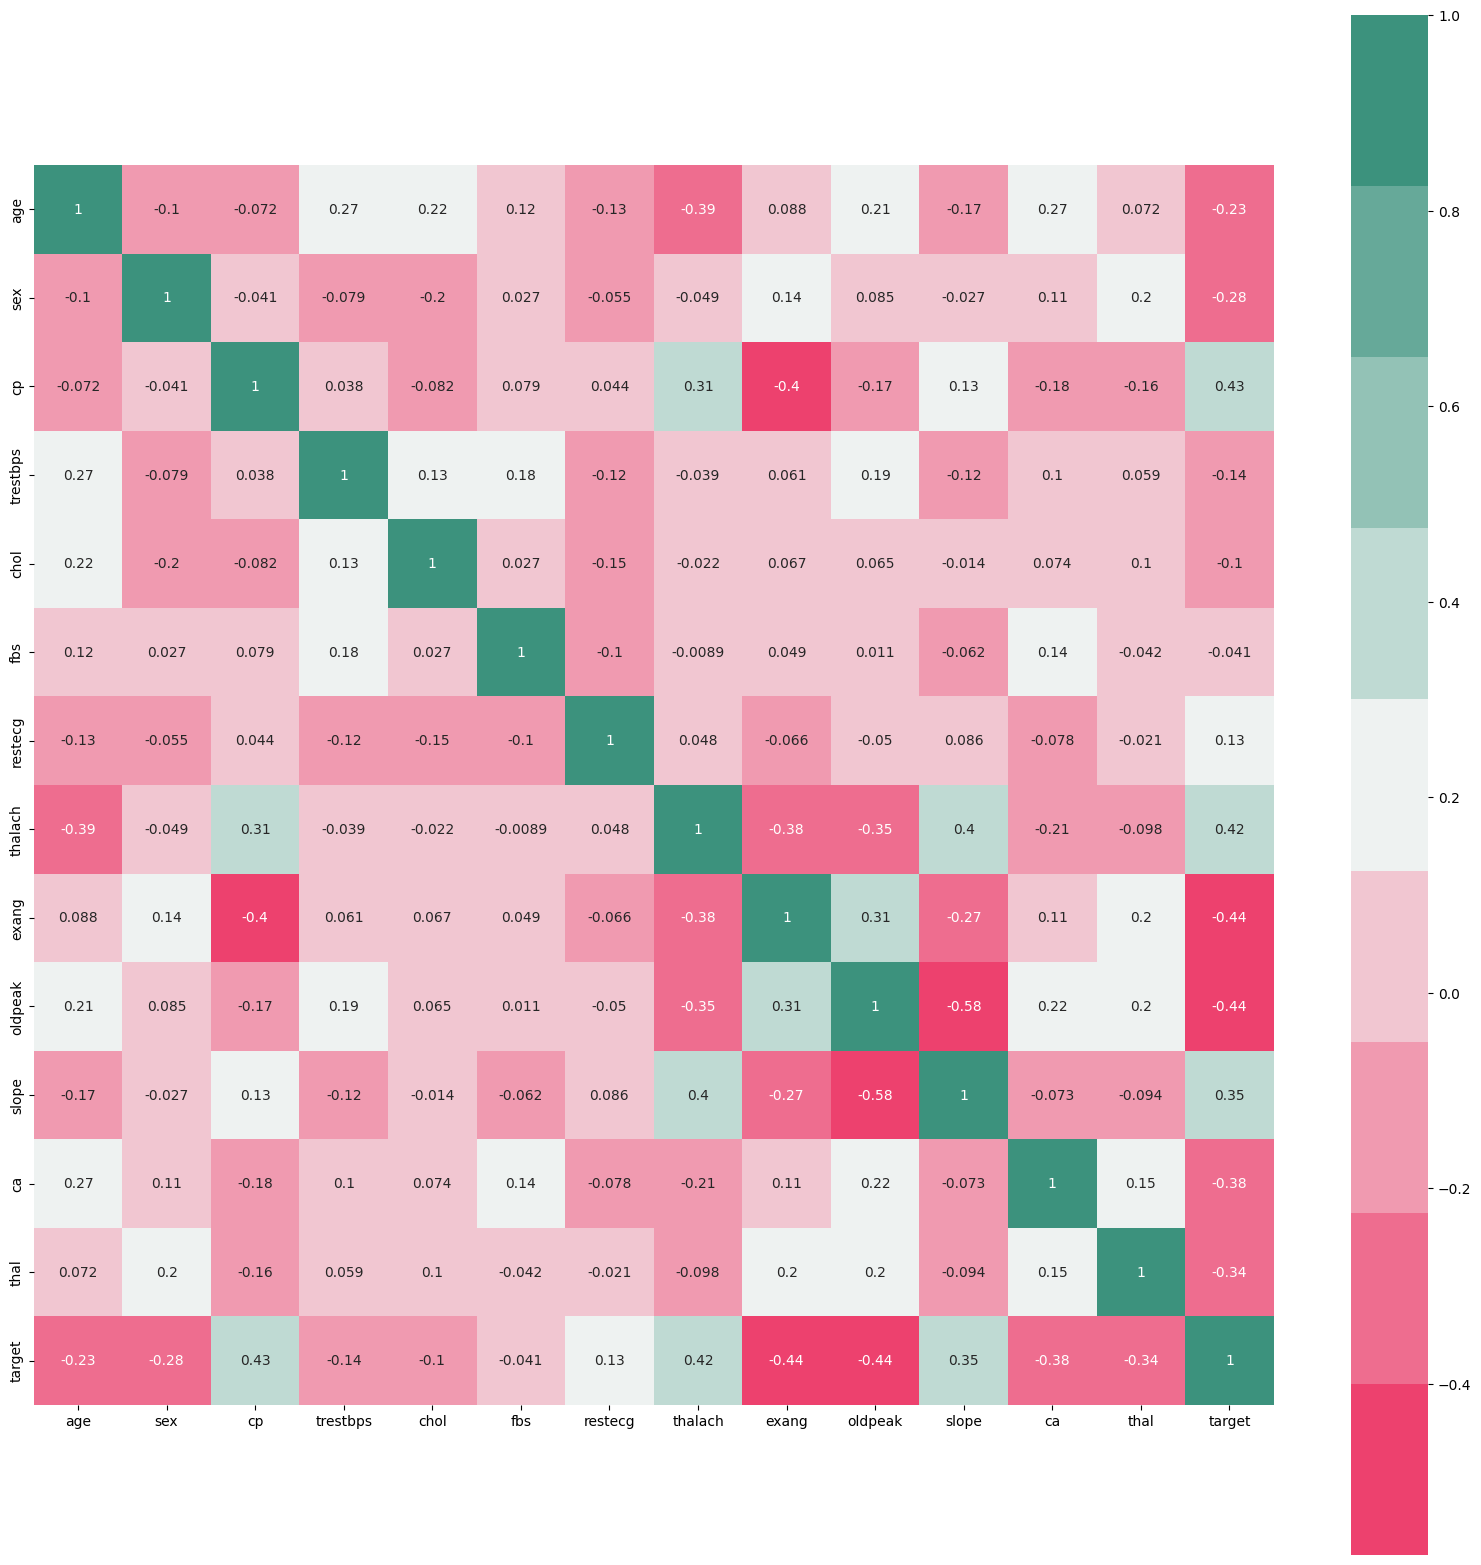

In [13]:
cmap = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(20,20))
sns.heatmap(cor,cmap= cmap,annot=True, square=True)

## Assigning independent features as x and target as y

In [15]:
x = data.drop(['target'],axis=1)
y=data['target']

In [17]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [18]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Preprocessing the independent variable

In [19]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

In [20]:
scaled_x= scale.fit_transform(x)

### Splitting dataset into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=5)

In [27]:
print(x_train.shape)
n_input= x_train.shape[1]
print(n_input)



(820, 13)
13


# keras model development

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense
#from keras.utils import to_categorical

In [62]:
# define keras model

def prediction_model():

    model=Sequential()
    model.add(Dense(32, activation='relu',input_shape=(n_input,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    #compile model
    model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
    return model

In [63]:
model=prediction_model()

In [72]:
# fit model 

history=model.fit(x_train,y_train,epochs=50,validation_data=(x_test, y_test),verbose=2,batch_size=10)

Epoch 1/50
82/82 - 1s - loss: 0.0073 - accuracy: 0.9988 - val_loss: 0.0125 - val_accuracy: 0.9951 - 502ms/epoch - 6ms/step
Epoch 2/50
82/82 - 1s - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000 - 693ms/epoch - 8ms/step
Epoch 3/50
82/82 - 0s - loss: 0.0069 - accuracy: 0.9988 - val_loss: 0.0063 - val_accuracy: 1.0000 - 283ms/epoch - 3ms/step
Epoch 4/50
82/82 - 0s - loss: 0.0083 - accuracy: 0.9963 - val_loss: 0.0128 - val_accuracy: 1.0000 - 267ms/epoch - 3ms/step
Epoch 5/50
82/82 - 0s - loss: 0.0210 - accuracy: 0.9817 - val_loss: 0.0477 - val_accuracy: 0.9610 - 280ms/epoch - 3ms/step
Epoch 6/50
82/82 - 0s - loss: 0.0561 - accuracy: 0.9561 - val_loss: 0.0599 - val_accuracy: 0.9415 - 271ms/epoch - 3ms/step
Epoch 7/50
82/82 - 0s - loss: 0.0624 - accuracy: 0.9354 - val_loss: 0.0759 - val_accuracy: 0.9220 - 274ms/epoch - 3ms/step
Epoch 8/50
82/82 - 0s - loss: 0.0409 - accuracy: 0.9610 - val_loss: 0.0803 - val_accuracy: 0.9024 - 290ms/epoch - 4ms/step
Epoch 9/50
82/82

In [67]:
score=model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9463


In [57]:
print("Performance of the model using the test data is: accuracy={}, error={}".format(score[1],100-score[1]*100))

Performance of the model using the test data is: accuracy=0.9853658676147461, error=1.4634132385253906


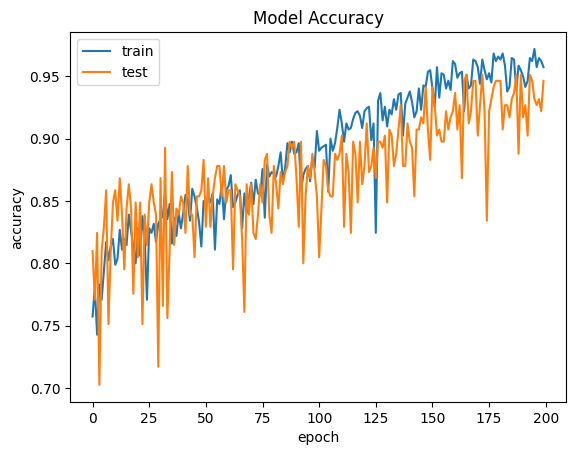

In [69]:
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

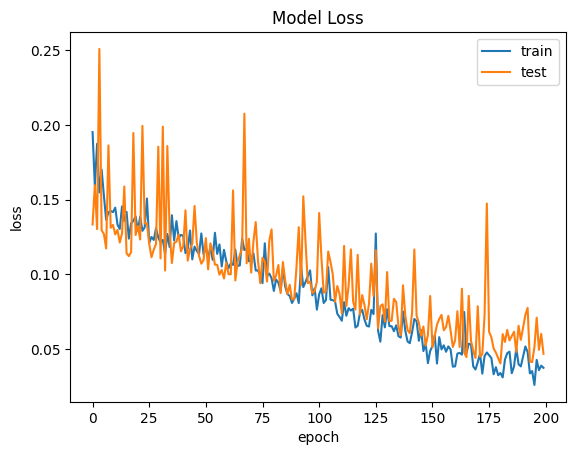

In [70]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()